# K-Nearest Neighbors (KNN)

## What is K-Nearest Neighbors?
K-Nearest Neighbors (KNN) is a **supervised machine learning algorithm** used for both **classification** and **regression** tasks. It is a **non-parametric** and **instance-based** learning method, meaning it does not make assumptions about the underlying data distribution and memorizes the training data to make predictions.

---

## Why is KNN Used?
- **For Simplicity**: KNN is easy to implement and intuitive.
- **Versatility**: It can handle classification and regression problems.
- **Non-parametric**: Useful for datasets where no assumption about the data distribution can be made.
- **Adaptable**: Works well with multi-class classification problems.

---

## How Does KNN Work?

### 1. Data Representation
- Each data point is represented in an n-dimensional feature space.
- For classification, each point is labeled with a class.
- For regression, each point has a continuous target value.

### 2. Prediction
When a new data point needs to be classified or predicted, the algorithm:
1. Calculates the **distance** (e.g., Euclidean distance) from the new point to all training points.
2. Selects the **k nearest neighbors** (smallest distances).
3. Aggregates the neighbors:
   - **Classification**: Assigns the most common class (majority voting).
   - **Regression**: Calculates the average (or weighted average) of their target values.

### 3. Distance Metrics
Commonly used metrics for calculating distances:
- **Euclidean Distance**: sqrt(sum((x_i - y_i)^2))
- **Manhattan Distance**: sum(|x_i - y_i|)
- **Minkowski Distance**: Generalized form combining Euclidean and Manhattan distances.

---

## Key Technical Terms in KNN
- **k (Number of Neighbors)**:
  - A hyperparameter that determines how many neighbors to consider.
  - Small k: Sensitive to noise (overfitting).
  - Large k: Can underfit by ignoring local patterns.
- **Weighted Voting**:
  - Neighbors closer to the new point may have higher influence.
- **Instance-based Learning**:
  - Unlike parametric algorithms (e.g., Logistic Regression), KNN doesn’t build a model. It memorizes the training data.
- **Lazy Learning**:
  - The algorithm does no computation during training but performs all the work during prediction.

---

## How is KNN Different from Logistic Regression?

| **Feature**                 | **KNN**                                     | **Logistic Regression**                     |
|-----------------------------|---------------------------------------------|---------------------------------------------|
| **Type**                    | Non-parametric                             | Parametric (assumes linear decision boundary). |
| **Learning Approach**       | Instance-based (lazy)                      | Model-based (eager).                        |
| **Data Assumptions**        | No assumptions about the data distribution.| Assumes a linear relationship between features and log-odds. |
| **Complexity**              | Simple to implement, computationally expensive during prediction.| Requires training, computationally faster during prediction. |
| **Performance on Large Data** | Struggles with very large datasets.       | Scales better for large datasets.           |
| **Multicollinearity**       | Unaffected by multicollinearity.            | Sensitive to multicollinearity.             |

---

## When to Use KNN?
- **Low-dimensional datasets**: KNN struggles with high-dimensional data (curse of dimensionality).
- **Balanced datasets**: Works well when classes are evenly distributed.
- **Non-linear decision boundaries**: Logistic regression may fail where KNN can adapt to complex patterns.
- **Small datasets**: Since it stores all training data, KNN is memory-intensive for large datasets.

---

## How to Evaluate KNN?

### Classification Metrics
- **Accuracy**: Proportion of correctly classified samples.
- **Precision, Recall, F1-Score**: Handle imbalanced datasets effectively.
- **Confusion Matrix**: Provides a breakdown of TP, TN, FP, and FN.
- **ROC-AUC Score**: For evaluating the model's ability to distinguish between classes.

### Regression Metrics
- **Mean Absolute Error (MAE)**.
- **Mean Squared Error (MSE)**.
- **R² Score**: Measures how well the regression predictions approximate the true values.

### Cross-validation
- Splits data into train/test sets multiple times to evaluate performance robustly.

### Grid Search for k
- Use grid search with cross-validation to determine the optimal k value.

---

## Strengths of KNN
- **Simple and Easy to Implement**.
- **No Training Phase**: Computationally cheap during training.
- **Non-linear Boundaries**: Can adapt to complex decision boundaries.
- **Robust to Noise** (if k is chosen carefully).

---

## Limitations of KNN
- **Computational Cost**: Prediction requires computing distances to all training samples, which can be slow for large datasets.
- **Curse of Dimensionality**: In high-dimensional spaces, distances become less meaningful.
- **Sensitive to Scaling**: Features need to be standardized or normalized for fair distance calculation.
- **Choice of k**: Selecting an optimal k value is crucial and can vary based on the dataset.

---

## Summary
- KNN is a simple, versatile algorithm suitable for small, non-linear, and low-dimensional datasets.
- It differs from Logistic Regression by being non-parametric and instance-based.
- The algorithm’s performance depends heavily on:
  - The choice of distance metric.
  - The number of neighbors (k).
  - Proper scaling of features.
- Evaluation involves classification and regression metrics, depending on the task.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data", index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variable
Because KNN depend on the distance of different points, it is important to scale the data because any variable that are on a large scale will have a much larger effect on the distance between the observations

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'],test_size=0.3)

## KNN

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [14]:
print(confusion_matrix(y_test, pred))

[[143  16]
 [ 12 129]]


In [15]:
print(confusion_matrix(pred, y_test))

[[143  12]
 [ 16 129]]


In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       159
           1       0.89      0.91      0.90       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



## Chossing a K value

In [17]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

<Axes: >

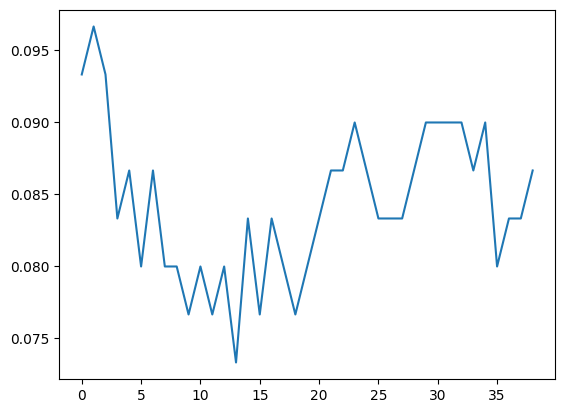

In [20]:
sns.lineplot(error_rate,markers='o')

Text(0, 0.5, 'Error Rate')

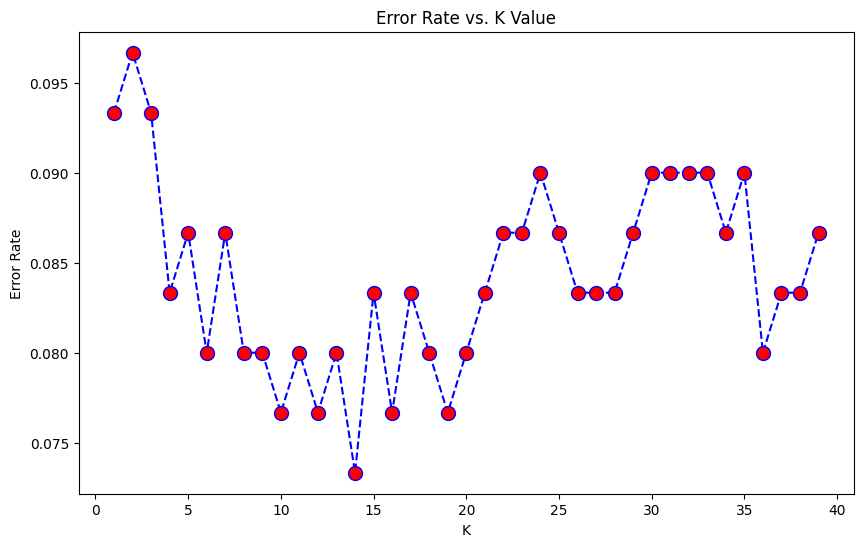

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
error_rate = {}

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate[i] = np.mean(pred_i != y_test)

In [25]:
min_k = min(error_rate, key=error_rate.get)
min_k

14

In [26]:
error_rate[min_k]

np.float64(0.07333333333333333)

## Model with k=14

In [27]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       159
           1       0.90      0.95      0.92       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

